<a href="https://colab.research.google.com/github/UNB-TME/assignment-2-tranfer-learning-saisandeepponna/blob/main/Breast_Cancer_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #Manipulating data
import numpy as np #For Math operations
import seaborn as sns #For visualization purpose
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split # For Spliting data to training and testing data
from sklearn.preprocessing import MinMaxScaler # MinMaxScaler For fitting the data to the model, it optimize model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from sklearn.metrics import classification_report,confusion_matrix #For model evaluation metrics
import itertools



In [ ]:
#Preparing google drive ot import the dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing the data
cancer_data=pd.read_csv('/content/drive/MyDrive/ML_WORKFLOW/cancer_classification.csv')

In [ ]:
cancer_data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

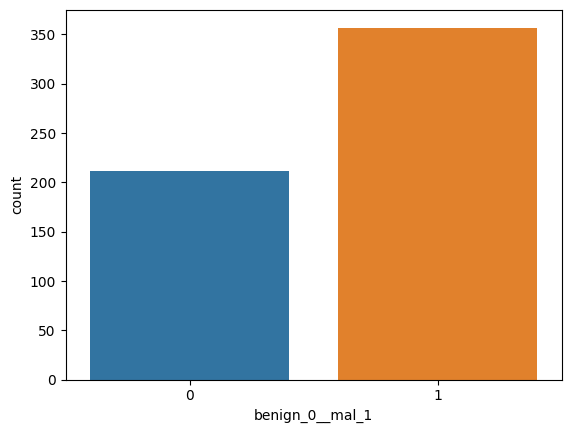

In [ ]:
sns.countplot(x='benign_0__mal_1',data=cancer_data)

<Axes: >

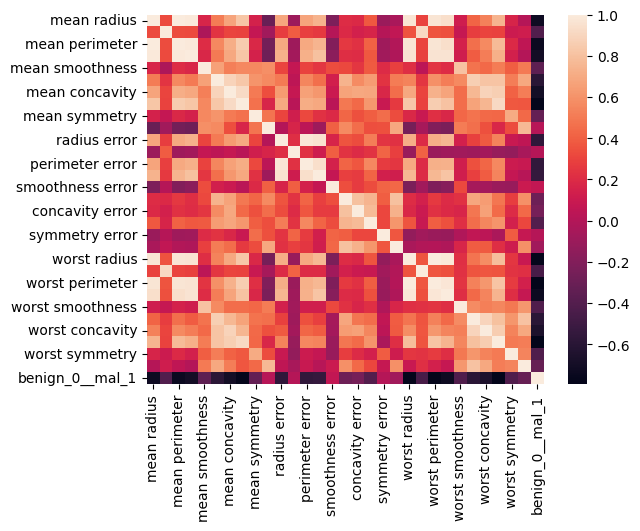

In [ ]:
sns.heatmap(cancer_data.corr())

In [ ]:
X = cancer_data.drop('benign_0__mal_1',axis=1).values
y = cancer_data['benign_0__mal_1'].values
#split the data into training and testing by Train test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [ ]:
#|As we splited the data, let's now scale them to optimize model training

scaler=MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(X_train,
          y=y_train,
          epochs=100,
          validation_data=(X_test,y_test),
          verbose=1,
          callbacks=[early_stop]

         )

Epoch 1/100
14/14 [==============================] - 3s 35ms/step - loss: 0.7126 - val_loss: 0.6906
Epoch 2/100
14/14 [==============================] - 0s 9ms/step - loss: 0.7019 - val_loss: 0.6745
Epoch 3/100
14/14 [==============================] - 0s 9ms/step - loss: 0.6813 - val_loss: 0.6612
Epoch 4/100
14/14 [==============================] - 0s 11ms/step - loss: 0.6748 - val_loss: 0.6460
Epoch 5/100
14/14 [==============================] - 0s 10ms/step - loss: 0.6474 - val_loss: 0.6297
Epoch 6/100
14/14 [==============================] - 0s 10ms/step - loss: 0.6175 - val_loss: 0.6069
Epoch 7/100
14/14 [==============================] - 0s 13ms/step - loss: 0.6135 - val_loss: 0.5820
Epoch 8/100
14/14 [==============================] - 0s 9ms/step - loss: 0.5990 - val_loss: 0.5582
Epoch 9/100
14/14 [==============================] - 0s 12ms/step - loss: 0.5834 - val_loss: 0.5311
Epoch 10/100
14/14 [==============================] - 0s 12ms/step - loss: 0.5335 - val_loss: 0.4996
Ep

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1411 (5.51 KB)
Trainable params: 1411 (5.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Axes: >

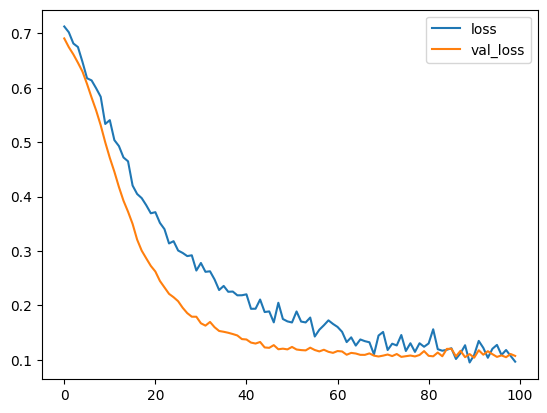

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 2ms/step


In [ ]:
def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title(title)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="black" if cm[i, j] > thresh else "white")
    plt.show()

Model Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Confusion Matrix


<ipython-input-16-b043df30f57b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-16-b043df30f57b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


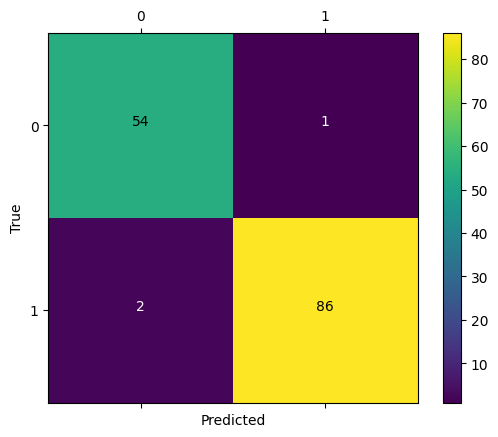

None


In [ ]:
print('Model Classification Report')
print(classification_report(y_test,predictions))

print('Confusion Matrix')
print(plot_confusion_matrix(y_test,predictions))